# SVM & Naïve Bayes 



## Part A — Theory (SVM)

### 1) What is a Support Vector Machine (SVM)?
A **Support Vector Machine (SVM)** is a supervised ML algorithm used for **classification** and **regression**.  
For classification, it finds a **decision boundary (hyperplane)** that **maximizes the margin** (distance) between the closest points of each class.

---

### 2) Difference between Hard Margin and Soft Margin SVM
- **Hard Margin SVM**
  - Assumes data is perfectly linearly separable.
  - No misclassification allowed.
  - Very sensitive to outliers.
- **Soft Margin SVM**
  - Allows some violations using **slack variables** (misclassified or inside-margin points).
  - Controlled by **C** (regularization parameter).
  - More robust to noise/outliers.

---

### 3) Mathematical intuition behind SVM
SVM tries to choose the hyperplane that gives the **largest margin** between classes.  
For a linear separator \(w^T x + b = 0\), maximizing the margin is equivalent to minimizing \(\|w\|\) under correct classification constraints.

Primal (soft margin) idea:
\[
\min_{w,b,\xi} \frac{1}{2}\|w\|^2 + C \sum_i \xi_i
\quad \text{s.t.}\quad y_i(w^Tx_i+b)\ge 1-\xi_i,\ \xi_i\ge 0
\]

---

### 4) Role of Lagrange Multipliers in SVM
SVM optimization has constraints. **Lagrange multipliers** convert the constrained primal problem into a **dual problem**.  
Benefits:
- Only depends on **dot-products** \(x_i^T x_j\) → enables kernels.
- Efficient for high-dimensional problems.
- Provides weights \(\alpha_i\) where non-zero \(\alpha_i\) correspond to support vectors.

---

### 5) What are Support Vectors?
**Support vectors** are the training points closest to the decision boundary (on/inside the margin).  
They **determine the hyperplane**: moving other points far from the margin usually doesn’t change the boundary, but moving support vectors does.

---

### 6) What is a Support Vector Classifier (SVC)?
**SVC** is the SVM formulation used for **classification** tasks (e.g., in scikit-learn: `sklearn.svm.SVC`).  
It can be **linear** or **non-linear** depending on the kernel used.

---

### 7) What is a Support Vector Regressor (SVR)?
**SVR** is SVM used for **regression**. It fits a function such that errors within an \(\epsilon\)-tube are ignored (epsilon-insensitive loss), and penalizes deviations outside the tube.

---

### 8) What is the Kernel Trick in SVM?
The **kernel trick** lets SVM learn non-linear boundaries by implicitly mapping data to a higher-dimensional space:
\[
K(x,z) = \phi(x)^T \phi(z)
\]
without computing \(\phi(x)\) explicitly.

---

### 9) Compare Linear, Polynomial, and RBF Kernel
- **Linear kernel:** \(K(x,z)=x^T z\)
  - Best when data is roughly linearly separable or features are high-dimensional (e.g., text).
- **Polynomial kernel:** \(K(x,z)=(\gamma x^T z + r)^d\)
  - Captures feature interactions; can overfit for large degree.
- **RBF (Gaussian) kernel:** \(K(x,z)=\exp(-\gamma\|x-z\|^2)\)
  - Very flexible; works well for complex non-linear boundaries; needs tuning \(\gamma\) and \(C\).

---

### 10) Effect of the C parameter in SVM
- **Large C** → tries to classify training points correctly (less regularization) → **smaller margin**, possible overfitting.
- **Small C** → allows more violations (more regularization) → **wider margin**, better generalization in noisy data.

---

### 11) Role of Gamma in RBF SVM
\(\gamma\) controls how far the influence of a single training example reaches:
- **High gamma:** very localized influence → complex boundary → risk of overfitting.
- **Low gamma:** broader influence → smoother boundary → risk of underfitting.

---

## Part B — Theory (Naïve Bayes)

### 12) What is Naïve Bayes and why “Naïve”?
**Naïve Bayes** is a probabilistic classifier based on Bayes’ theorem.  
It’s called **“naïve”** because it assumes **features are conditionally independent given the class**, which is often not strictly true but works surprisingly well.

---

### 13) Bayes’ Theorem
\[
P(y \mid x) = \frac{P(x \mid y)P(y)}{P(x)}
\]
In classification, compare \(P(y \mid x)\) across classes and pick the maximum.

---

### 14) Gaussian vs Multinomial vs Bernoulli Naïve Bayes
- **Gaussian NB:** features are continuous and assumed normally distributed.
- **Multinomial NB:** count-based features (e.g., word counts in text).
- **Bernoulli NB:** binary features (0/1), e.g., word present/absent.

---

### 15) When to use Gaussian NB?
Use **Gaussian NB** when your features are **continuous** (e.g., medical measurements) and approximately Gaussian per class.

---

### 16) Key assumptions in Naïve Bayes
- Conditional independence of features given the class.
- Correct likelihood model (Gaussian / Multinomial / Bernoulli) for the feature type.
- Training samples are representative.

---

### 17) Advantages and disadvantages of Naïve Bayes
**Advantages**
- Very fast, scales well.
- Works well in high-dimensional spaces (text).
- Needs less training data.
**Disadvantages**
- Independence assumption can be unrealistic.
- Probability estimates may be poor (though classification can still be good).

---

### 18) Why good for text classification?
Text data is high-dimensional and sparse; independence assumption works reasonably with bag-of-words. Multinomial NB is efficient and often competitive for spam/topic classification.

---

### 19) Compare SVM vs Naïve Bayes
- **SVM:** strong accuracy; works well with kernels; slower training; sensitive to feature scaling (esp. RBF).
- **Naïve Bayes:** extremely fast; great baseline for text; may lose accuracy if feature dependencies matter.

---

### 20) How does Laplace Smoothing help?
Laplace smoothing (add-\(\alpha\)) prevents **zero probabilities** for unseen feature values:
\[
P(w \mid y)=\frac{count(w,y)+\alpha}{\sum_w count(w,y)+\alpha |V|}
\]
This avoids the product becoming zero in Naïve Bayes.


## Common Imports & Helper Functions (used in multiple questions)

In [1]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, mean_squared_error, mean_absolute_error,
    precision_score, recall_score, f1_score, log_loss,
    roc_auc_score, precision_recall_curve
)
from sklearn.inspection import DecisionBoundaryDisplay


In [2]:

def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    """Plot decision boundary for 2D features."""
    disp = DecisionBoundaryDisplay.from_estimator(
        model, X, response_method="predict", alpha=0.3
    )
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", s=30)
    disp.ax_.set_title(title)
    plt.show()


## Part C — Theoretical Programs (as in the sheet)

#21. Train an SVM Classifier on the Iris dataset and evaluate accuracy

In [3]:

from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

clf = SVC(kernel="rbf", C=1.0, gamma="scale")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9666666666666667


### ##) Train two SVM classifiers (Linear & RBF) on Wine dataset and compare accuracy

In [4]:

from sklearn.datasets import load_wine
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Linear": Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", C=1.0))]),
    "RBF":    Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))]),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(f"{name} kernel accuracy:", accuracy_score(y_test, pred))


Linear kernel accuracy: 0.9444444444444444
RBF kernel accuracy: 0.9722222222222222


### #$) Train an SVR on a housing dataset and evaluate using MSE

In [5]:

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR

# This dataset ships with scikit-learn (no external download needed in most installs)
housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(kernel="rbf", C=10.0, gamma="scale", epsilon=0.1))
])

svr.fit(X_train, y_train)
pred = svr.predict(X_test)

mse = mean_squared_error(y_test, pred)
print("SVR MSE:", mse)


SVR MSE: 0.3236951090338481


### #% ) Train SVM with Polynomial Kernel and visualize decision boundary (2D demo)

Accuracy: 0.9


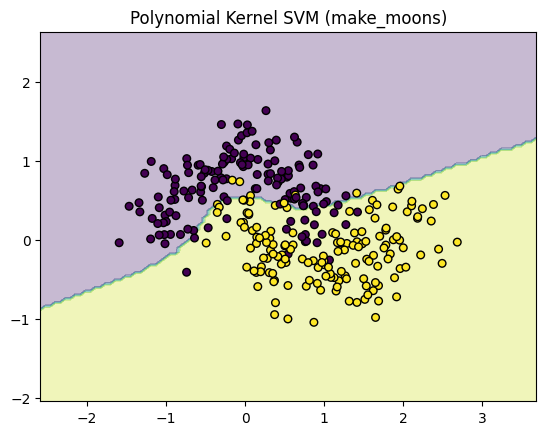

In [6]:

from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

model = SVC(kernel="poly", degree=3, C=1.0, gamma="scale")
model.fit(X, y)

print("Accuracy:", model.score(X, y))
plot_decision_boundary(model, X, y, title="Polynomial Kernel SVM (make_moons)")


### #! ) Train Gaussian Naïve Bayes on Breast Cancer dataset and evaluate accuracy

In [7]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.9385964912280702


### #; ) Multinomial Naïve Bayes for text classification (20 Newsgroups)

In [8]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# NOTE: fetch_20newsgroups may require internet on first run.
# This cell is written to run when the dataset is available.
try:
    from sklearn.datasets import fetch_20newsgroups
    
    categories = ["sci.space", "rec.sport.baseball", "talk.politics.mideast"]
    train_data = fetch_20newsgroups(subset="train", categories=categories, remove=("headers","footers","quotes"))
    test_data  = fetch_20newsgroups(subset="test",  categories=categories, remove=("headers","footers","quotes"))
    
    vectorizer = CountVectorizer(stop_words="english", max_features=20000)
    X_train = vectorizer.fit_transform(train_data.data)
    X_test  = vectorizer.transform(test_data.data)
    
    clf = MultinomialNB(alpha=1.0)  # Laplace smoothing
    clf.fit(X_train, train_data.target)
    pred = clf.predict(X_test)
    
    print("Accuracy:", accuracy_score(test_data.target, pred))
except Exception as e:
    print("Could not run fetch_20newsgroups in this environment.")
    print("Error:", e)
    print("\nTip: Run this cell on your local machine with internet + scikit-learn datasets enabled.")


Accuracy: 0.9134532990574121


## Part D — Practical Programs (as in the sheet)

### 1) Train SVM with different C values and compare decision boundaries visually

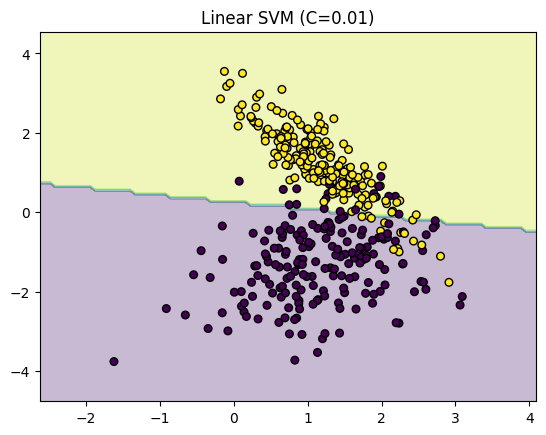

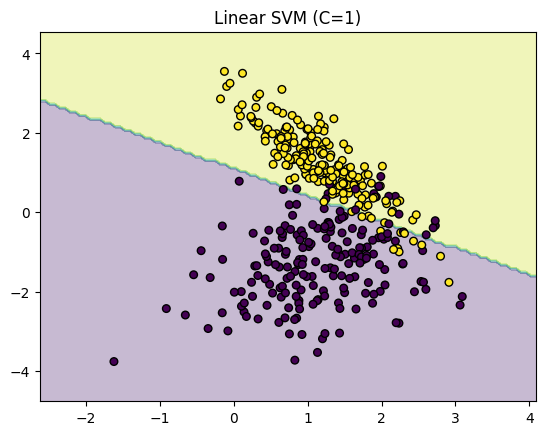

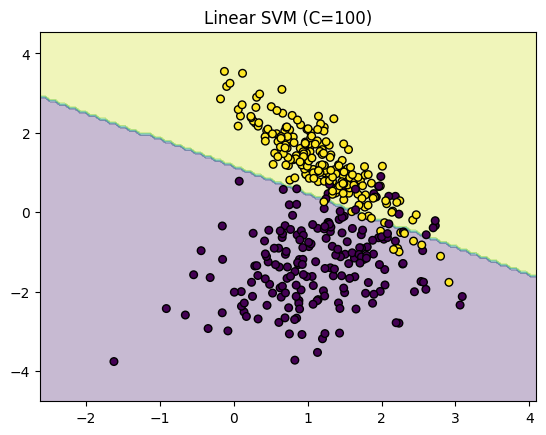

In [9]:

from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=400, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, class_sep=1.2, random_state=42
)

C_values = [0.01, 1, 100]

for C in C_values:
    model = SVC(kernel="linear", C=C)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Linear SVM (C={C})")


### 2) Bernoulli Naïve Bayes for binary classification on a dataset with binary features

In [10]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

# Create binary features by thresholding continuous features
X, y = make_classification(n_samples=800, n_features=10, random_state=42)
X_bin = (X > np.median(X, axis=0)).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X_bin, y, test_size=0.2, random_state=42, stratify=y)

bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))


Accuracy: 0.8875


### 3) Apply feature scaling before SVM and compare results with unscaled data

In [11]:

from sklearn.datasets import load_wine
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Unscaled
svm_unscaled = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_unscaled.fit(X_train, y_train)
pred_unscaled = svm_unscaled.predict(X_test)

# Scaled (recommended for RBF)
svm_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
svm_scaled.fit(X_train, y_train)
pred_scaled = svm_scaled.predict(X_test)

print("Unscaled Accuracy:", accuracy_score(y_test, pred_unscaled))
print("Scaled Accuracy:  ", accuracy_score(y_test, pred_scaled))


Unscaled Accuracy: 0.6944444444444444
Scaled Accuracy:   0.9722222222222222


### 4) Gaussian NB and compare predictions before/after Laplace smoothing


**Note:** Laplace smoothing is typically used with **MultinomialNB** / **BernoulliNB** (discrete features).  
GaussianNB models continuous features; `var_smoothing` is a numerical stabilization term (not classic Laplace smoothing).  
Below we demonstrate smoothing using **MultinomialNB** on count features (a standard interpretation).


In [12]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

texts = [
    "buy cheap meds now",
    "limited offer buy now",
    "meeting schedule for tomorrow",
    "project discussion and meeting",
    "cheap cheap offer",
    "let us discuss the project plan",
]
labels = np.array([1, 1, 0, 0, 1, 0])  # 1=spam-like, 0=ham-like

vec = CountVectorizer()
X = vec.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.33, random_state=42, stratify=labels)

# Without smoothing (alpha very small -> can lead to zero probabilities)
nb_no_smooth = MultinomialNB(alpha=1e-9)
nb_no_smooth.fit(X_train, y_train)
pred1 = nb_no_smooth.predict(X_test)

# With Laplace smoothing (alpha=1.0)
nb_smooth = MultinomialNB(alpha=1.0)
nb_smooth.fit(X_train, y_train)
pred2 = nb_smooth.predict(X_test)

print("Test labels:              ", y_test.tolist())
print("Predictions (no smoothing)", pred1.tolist())
print("Predictions (Laplace)     ", pred2.tolist())
print("Accuracy (no smoothing):  ", accuracy_score(y_test, pred1))
print("Accuracy (Laplace):       ", accuracy_score(y_test, pred2))


Test labels:               [1, 0]
Predictions (no smoothing) [1, 0]
Predictions (Laplace)      [1, 0]
Accuracy (no smoothing):   1.0
Accuracy (Laplace):        1.0


### 5) SVM + GridSearchCV to tune (C, gamma, kernel)

In [13]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

bc = load_breast_cancer()
X, y = bc.data, bc.target

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC())
])

param_grid = {
    "svc__kernel": ["linear", "rbf"],
    "svc__C": [0.1, 1, 10],
    "svc__gamma": ["scale", 0.01, 0.1]  # gamma ignored for linear but ok
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)
print("Test Accuracy:", grid.score(X_test, y_test))


Best Params: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best CV Score: 0.9802197802197803
Test Accuracy: 0.9824561403508771


### 6) SVM on imbalanced dataset + class weighting

In [14]:

from sklearn.datasets import make_classification
from sklearn.svm import SVC

X, y = make_classification(
    n_samples=4000, n_features=20, n_informative=10, n_redundant=5,
    weights=[0.92, 0.08], flip_y=0.01, random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Without class weights
svm_plain = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))])
svm_plain.fit(X_train, y_train)
pred_plain = svm_plain.predict(X_test)

# With class weights
svm_weighted = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", class_weight="balanced"))
])
svm_weighted.fit(X_train, y_train)
pred_weighted = svm_weighted.predict(X_test)

print("Accuracy (plain):   ", accuracy_score(y_test, pred_plain))
print("Accuracy (weighted):", accuracy_score(y_test, pred_weighted))
print("F1 (plain):         ", f1_score(y_test, pred_plain))
print("F1 (weighted):      ", f1_score(y_test, pred_weighted))


Accuracy (plain):    0.9675
Accuracy (weighted): 0.95625
F1 (plain):          0.7678571428571429
F1 (weighted):       0.779874213836478


### 7) Naïve Bayes classifier for spam detection (email/text demo dataset)

In [15]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

emails = [
    "Congratulations you won a free lottery claim now",
    "Get cheap meds online limited time offer",
    "Earn money fast from home click here",
    "Hi, can we schedule a meeting for the project update?",
    "Please find the attached report for last quarter",
    "Let's discuss the assignment submission details",
    "Win cash prize now claim your reward",
    "Reminder: your class starts at 8 AM tomorrow",
]
y = np.array([1,1,1,0,0,0,1,0])  # 1=spam, 0=ham

X_train, X_test, y_train, y_test = train_test_split(emails, y, test_size=0.25, random_state=42, stratify=y)

vec = TfidfVectorizer(stop_words="english")
X_train_vec = vec.fit_transform(X_train)
X_test_vec = vec.transform(X_test)

clf = MultinomialNB(alpha=1.0)
clf.fit(X_train_vec, y_train)
pred = clf.predict(X_test_vec)

print("Accuracy:", accuracy_score(y_test, pred))
print(classification_report(y_test, pred, target_names=["ham","spam"]))


Accuracy: 0.5
              precision    recall  f1-score   support

         ham       0.50      1.00      0.67         1
        spam       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



c:\Users\sablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\sablo\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

### 8) Train SVM and Naïve Bayes on same dataset and compare accuracy (Breast Cancer)

In [16]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

svm = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))])
svm.fit(X_train, y_train)
pred_svm = svm.predict(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print("NB  Accuracy:", accuracy_score(y_test, pred_nb))


SVM Accuracy: 0.9824561403508771
NB  Accuracy: 0.9385964912280702


### 9) Feature selection before Naïve Bayes and compare results

In [17]:

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline NB
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_base = nb.predict(X_test)
acc_base = accuracy_score(y_test, pred_base)

# Feature selection
selector = SelectKBest(score_func=f_classif, k=10)
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

nb2 = GaussianNB()
nb2.fit(X_train_sel, y_train)
pred_sel = nb2.predict(X_test_sel)
acc_sel = accuracy_score(y_test, pred_sel)

print("Baseline NB Accuracy:", acc_base)
print("NB with SelectKBest Accuracy:", acc_sel)


Baseline NB Accuracy: 0.9385964912280702
NB with SelectKBest Accuracy: 0.9298245614035088


### 10) SVM using OvR vs OvO on Wine dataset and compare accuracy

In [18]:

from sklearn.datasets import load_wine
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

ovo = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", decision_function_shape="ovo"))])
ovr = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", decision_function_shape="ovr"))])

ovo.fit(X_train, y_train)
ovr.fit(X_train, y_train)

print("OvO accuracy:", ovo.score(X_test, y_test))
print("OvR accuracy:", ovr.score(X_test, y_test))


OvO accuracy: 0.9722222222222222
OvR accuracy: 0.9722222222222222


### 11) SVM with Linear, Polynomial, and RBF kernels on Breast Cancer dataset

In [19]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Linear": Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", C=1.0))]),
    "Poly":   Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="poly", degree=3, C=1.0, gamma="scale"))]),
    "RBF":    Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))]),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} kernel accuracy:", model.score(X_test, y_test))


Linear kernel accuracy: 0.9736842105263158
Poly kernel accuracy: 0.9122807017543859
RBF kernel accuracy: 0.9824561403508771


### 12) Stratified K-Fold Cross-Validation for SVM and average accuracy

In [20]:

from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.svm import SVC

wine = load_wine()
X, y = wine.data, wine.target

model = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
print("Fold accuracies:", scores)
print("Average accuracy:", scores.mean())


Fold accuracies: [0.94444444 1.         0.97222222 1.         1.        ]
Average accuracy: 0.9833333333333332


### 13) Naïve Bayes with different prior probabilities and compare performance

In [21]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

priors_list = [
    None,                  # Learn from data
    [0.5, 0.5],            # Equal priors
    [0.7, 0.3],            # Custom priors (class 0=0.7, class 1=0.3)
]

for priors in priors_list:
    nb = GaussianNB(priors=priors)
    nb.fit(X_train, y_train)
    pred = nb.predict(X_test)
    print("Priors:", priors, "| Accuracy:", accuracy_score(y_test, pred))


Priors: None | Accuracy: 0.9385964912280702
Priors: [0.5, 0.5] | Accuracy: 0.9385964912280702
Priors: [0.7, 0.3] | Accuracy: 0.9298245614035088


### 14) Recursive Feature Elimination (RFE) before SVM and compare accuracy

In [22]:

from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Baseline SVM
base = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="linear", C=1.0))])
base.fit(X_train, y_train)
acc_base = base.score(X_test, y_test)

# RFE with linear SVM estimator (works well)
est = SVC(kernel="linear", C=1.0)
rfe = RFE(estimator=est, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(StandardScaler().fit_transform(X_train), y_train)
X_test_rfe = rfe.transform(StandardScaler().fit_transform(X_test))

svm_rfe = SVC(kernel="linear", C=1.0)
svm_rfe.fit(X_train_rfe, y_train)
acc_rfe = svm_rfe.score(X_test_rfe, y_test)

print("Baseline accuracy:", acc_base)
print("RFE+SVM accuracy:", acc_rfe)


Baseline accuracy: 0.9736842105263158
RFE+SVM accuracy: 0.956140350877193


### 15) Evaluate SVM using Precision, Recall, and F1-Score

In [23]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))])
model.fit(X_train, y_train)
pred = model.predict(X_test)

print("Precision:", precision_score(y_test, pred))
print("Recall:   ", recall_score(y_test, pred))
print("F1-score: ", f1_score(y_test, pred))


Precision: 0.9861111111111112
Recall:    0.9861111111111112
F1-score:  0.9861111111111112


### 16) Naïve Bayes evaluation using Log Loss (Cross-Entropy Loss)

In [24]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb = GaussianNB()
nb.fit(X_train, y_train)

proba = nb.predict_proba(X_test)
print("Log Loss:", log_loss(y_test, proba))


Log Loss: 0.37125554670251204


### 17) SVM Confusion Matrix visualization

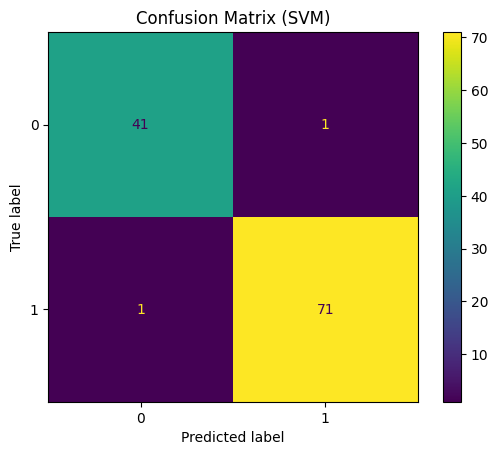

In [25]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = Pipeline([("scaler", StandardScaler()), ("svc", SVC(kernel="rbf", C=1.0, gamma="scale"))])
model.fit(X_train, y_train)
pred = model.predict(X_test)

disp = ConfusionMatrixDisplay.from_predictions(y_test, pred)
disp.ax_.set_title("Confusion Matrix (SVM)")
plt.show()


### 18) SVR performance using MAE (instead of MSE)

In [26]:

from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR

housing = fetch_california_housing()
X, y = housing.data, housing.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = Pipeline([("scaler", StandardScaler()), ("svr", SVR(kernel="rbf", C=10.0, gamma="scale", epsilon=0.1))])
svr.fit(X_train, y_train)
pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, pred)
print("SVR MAE:", mae)


SVR MAE: 0.37744436929218994


### 19) Naïve Bayes evaluation using ROC-AUC score

In [27]:

from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

nb = GaussianNB()
nb.fit(X_train, y_train)

proba = nb.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, proba)
print("ROC-AUC:", auc)


ROC-AUC: 0.9877645502645502


### 20) Precision–Recall Curve for SVM

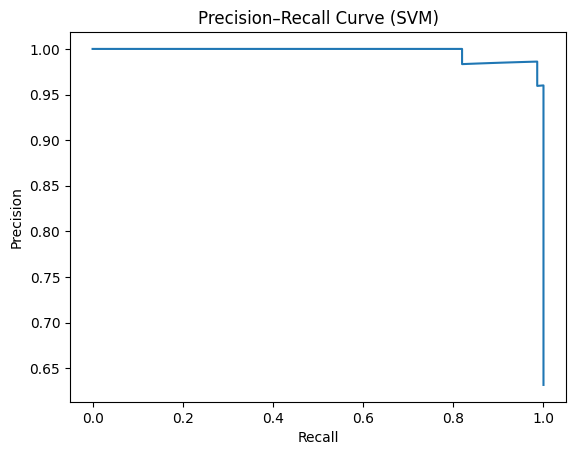

In [28]:

from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

bc = load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", C=1.0, gamma="scale", probability=True))
])
model.fit(X_train, y_train)

proba = model.predict_proba(X_test)[:, 1]
prec, rec, _ = precision_recall_curve(y_test, proba)

plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (SVM)")
plt.show()
